<a href="https://colab.research.google.com/github/AkshatHotCode/playstoreappreview_eda/blob/main/Akshat_Rajvanshi_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

##Introduction
In contemporary world where mobiles is one of the most necessary gadget in our life, mobiles app are everywhere as they are easy to create and can be very lucrative. Just because of thesetwo factors, the app market is developing huge day by day. Therefore in these project we will do a comprehensive exploratory data analysis of the Android App Market by comparing over 10 thousand apps in Google Play Store across various categories. We'll look for insights in the data to devise strategies to drive growth and retention.

# 1.Data Overview
Let's breifly look at the data we have been provided, which contains of two files:


*   apps.csv : This files contains all the details of the applications on Google Play Store. There are 13 specified features available in  these dataset that describes a given app.
*   user_reviews.csv : This files have 100 most helpful reviews for each  app. Moreover,the textin each review has been preprocessed and attributed with 3 unique features: Sentiment(Positive, Neutral or Negative), Sentiment Polarity and Sentiment Subjectivity.



In [1]:
#Importing Major Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sc

In [2]:
#Importing Drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
#Loading csv File
file_path = "/content/drive/MyDrive/Dataset_DS/PlayStoreData.csv"
apps = pd.read_csv(file_path)

In [4]:
apps.shape

(10841, 13)

In [5]:
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#2. Data Cleaning

Data cleaning is one of the most essential subtask of any data science project in order to have effective and efficient result.Though it can be a a very tedious process, it's worth should never be undermined.

First of all I'm checking is there any nan/missing values and if present, which characteristic has the most nan/missing values.

In [7]:
#Checking nan/missing values
apps.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [8]:
#Perentage of nan/missing values
(apps.isnull().sum()/apps.shape[0])*100

App                0.000000
Category           0.000000
Rating            13.596532
Reviews            0.000000
Size               0.000000
Installs           0.000000
Type               0.009224
Price              0.000000
Content Rating     0.009224
Genres             0.000000
Last Updated       0.000000
Current Ver        0.073794
Android Ver        0.027673
dtype: float64

Frome the above task, we got know that Ratings has the most nan/missing values in the dataset, followed by Type, Content Rating, Currrent Ver and Android Ver. In order to fill the nan/missing values we have find the most appropriate value for that. In order to do so, I'm initially plotting a histogram plot to know the skew of the data, and according to that I will be filling the missing data from mean, median and mode.

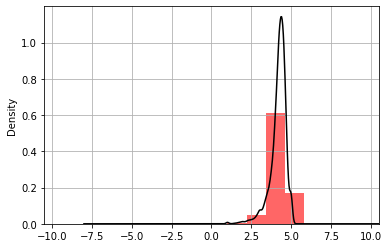

In [9]:
#Plotting histogram for Rating, as it has the highest nan/missing values(1474,13.59%)
a = apps['Rating'].hist(bins=15, density=True, stacked=True, color='Red', alpha=0.6)
apps["Rating"].plot(kind='density', color='black')

plt.grid()
plt.xlim(-10.5, 10.5)
plt.show()

Therefore, from the above task we got know that the histogram of Rating is skewed towards right.

In [10]:
#Cleaning the Rating data, in order to find mean, median and mode.
a_apps = apps[pd.notnull(apps['Rating'])]

#Finding mean, median and mode.
mean = np.mean(a_apps['Rating'])
median = np.median(a_apps['Rating'])
mode = sc.mode(a_apps['Rating'])

print(mean)
print(median)
print(mode)

4.193338315362448
4.3
ModeResult(mode=array([4.4]), count=array([1109]))


Since, the histogram of Rating is right skewed, I am taking median in place  of nan/missingvalues in Rating. In Type, Content Rating, Current Ver and Android Ver the missing value % is not considerable, I am dropping the nan/missing values.

In [11]:
#Fiiling median value in nan/missing values of Rating
apps['Rating'].fillna(median, inplace=True)

#Dropping nan/missing values of Type, Content Rating, Current ver and Android Ver
apps.dropna(inplace=True)

In [12]:
#Checking modified dataset
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


Further, I am checking for duplicate values and removing them.

In [13]:
#Checking if there are duplicates values  (Printing result in percentage)
(apps.duplicated().value_counts()/apps.shape[0])*100

False    95.539754
True      4.460246
dtype: float64

Around 4.4% of values in data is duplicate, so I am removing them.

In [14]:
#Removing duplcates
apps.drop_duplicates(inplace=True)

In [15]:
#Checking data after removing duplicates
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10346 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10346 non-null  object 
 1   Category        10346 non-null  object 
 2   Rating          10346 non-null  float64
 3   Reviews         10346 non-null  object 
 4   Size            10346 non-null  object 
 5   Installs        10346 non-null  object 
 6   Type            10346 non-null  object 
 7   Price           10346 non-null  object 
 8   Content Rating  10346 non-null  object 
 9   Genres          10346 non-null  object 
 10  Last Updated    10346 non-null  object 
 11  Current Ver     10346 non-null  object 
 12  Android Ver     10346 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


Now we can there are some special character present in features Installs and Price, moreover we would have to change the data types of certain columns to perform numerical operation effectively.

In [16]:
#Processing "Installs" column
#Removing special character(',','+') and converting it to a int datatype
apps['Installs']=apps['Installs'].str.replace(',','').str.replace('+','').astype('int')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
#Processing "Review" column
#Converting it to int datatype
apps['Reviews']=apps['Reviews'].astype('int')

In [18]:
#Processing "Size" column
#Checking data by using unique()
apps['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M',
       '11M', '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M',
       '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M',
       '5.7M', '8.6M', '2.4M', '27M', '2.7M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [19]:
#From the above task we noticed that the data is not uniform with respect to the size, as the data is available in both Mb and kb.
#Converting them to a uniform value and converting it to float datatype
apps['Size']=apps['Size'].str.replace('M','e+6').str.replace('k','e+3').str.replace('Varies with device','0').astype('float')

In [20]:
#Processing "Price" column
# Removing special character ($) and converting it to float datatype
apps['Price']=apps['Price'].str.replace('$','').astype('float')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
#Renaming Price to Price(in $)
apps.rename(columns={'Price':'Price(in $)'}, inplace=True)

In [22]:
#Processing "Category" column
#Removing special character(_)
apps['Category']=apps['Category'].str.replace('_','')

In [23]:
# Checking porcessed dataset
apps.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price(in $),Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ARTANDDESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ARTANDDESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ARTANDDESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [24]:
#Describing Dataset
apps.describe()

,Rating,Reviews,Size,Installs,Price(in $)
count,10346.00000,1.034600e+04,1.034600e+04,1.034600e+04,10346.000000
mean,4.20377,4.063338e+05,1.816602e+07,1.417266e+07,1.031561
std,0.48573,2.698179e+06,2.214556e+07,8.028090e+07,16.287252
min,1.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,4.10000,3.200000e+01,2.700000e+06,1.000000e+03,0.000000
50%,4.30000,1.688500e+03,9.100000e+06,1.000000e+05,0.000000
75%,4.50000,4.659825e+04,2.600000e+07,1.000000e+06,0.000000
max,5.00000,7.815831e+07,1.000000e+08,1.000000e+09,400.000000


# 3.Data Visualization

Datavisualization is the practice of translating information into a visual context, such as a map or graph, in order to make data easier for the human brain  to understand and pull insights from.\
I have used matplotlib and seaborn libraries for this project. 

3.1. Most Popular Category\
Let's find out which category has the most applications in the Google Play Store.

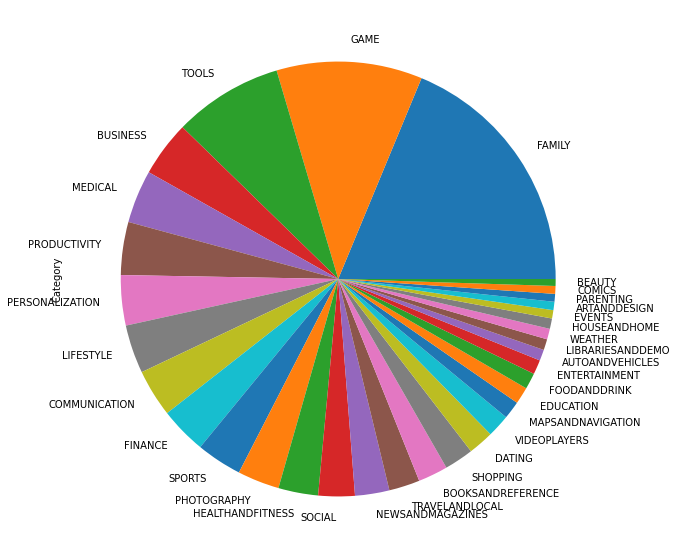

In [25]:
#Most Popular Category-Piechart
plt.figure(figsize=(100,10))
apps['Category'].value_counts().plot(kind='pie')
plt.show()

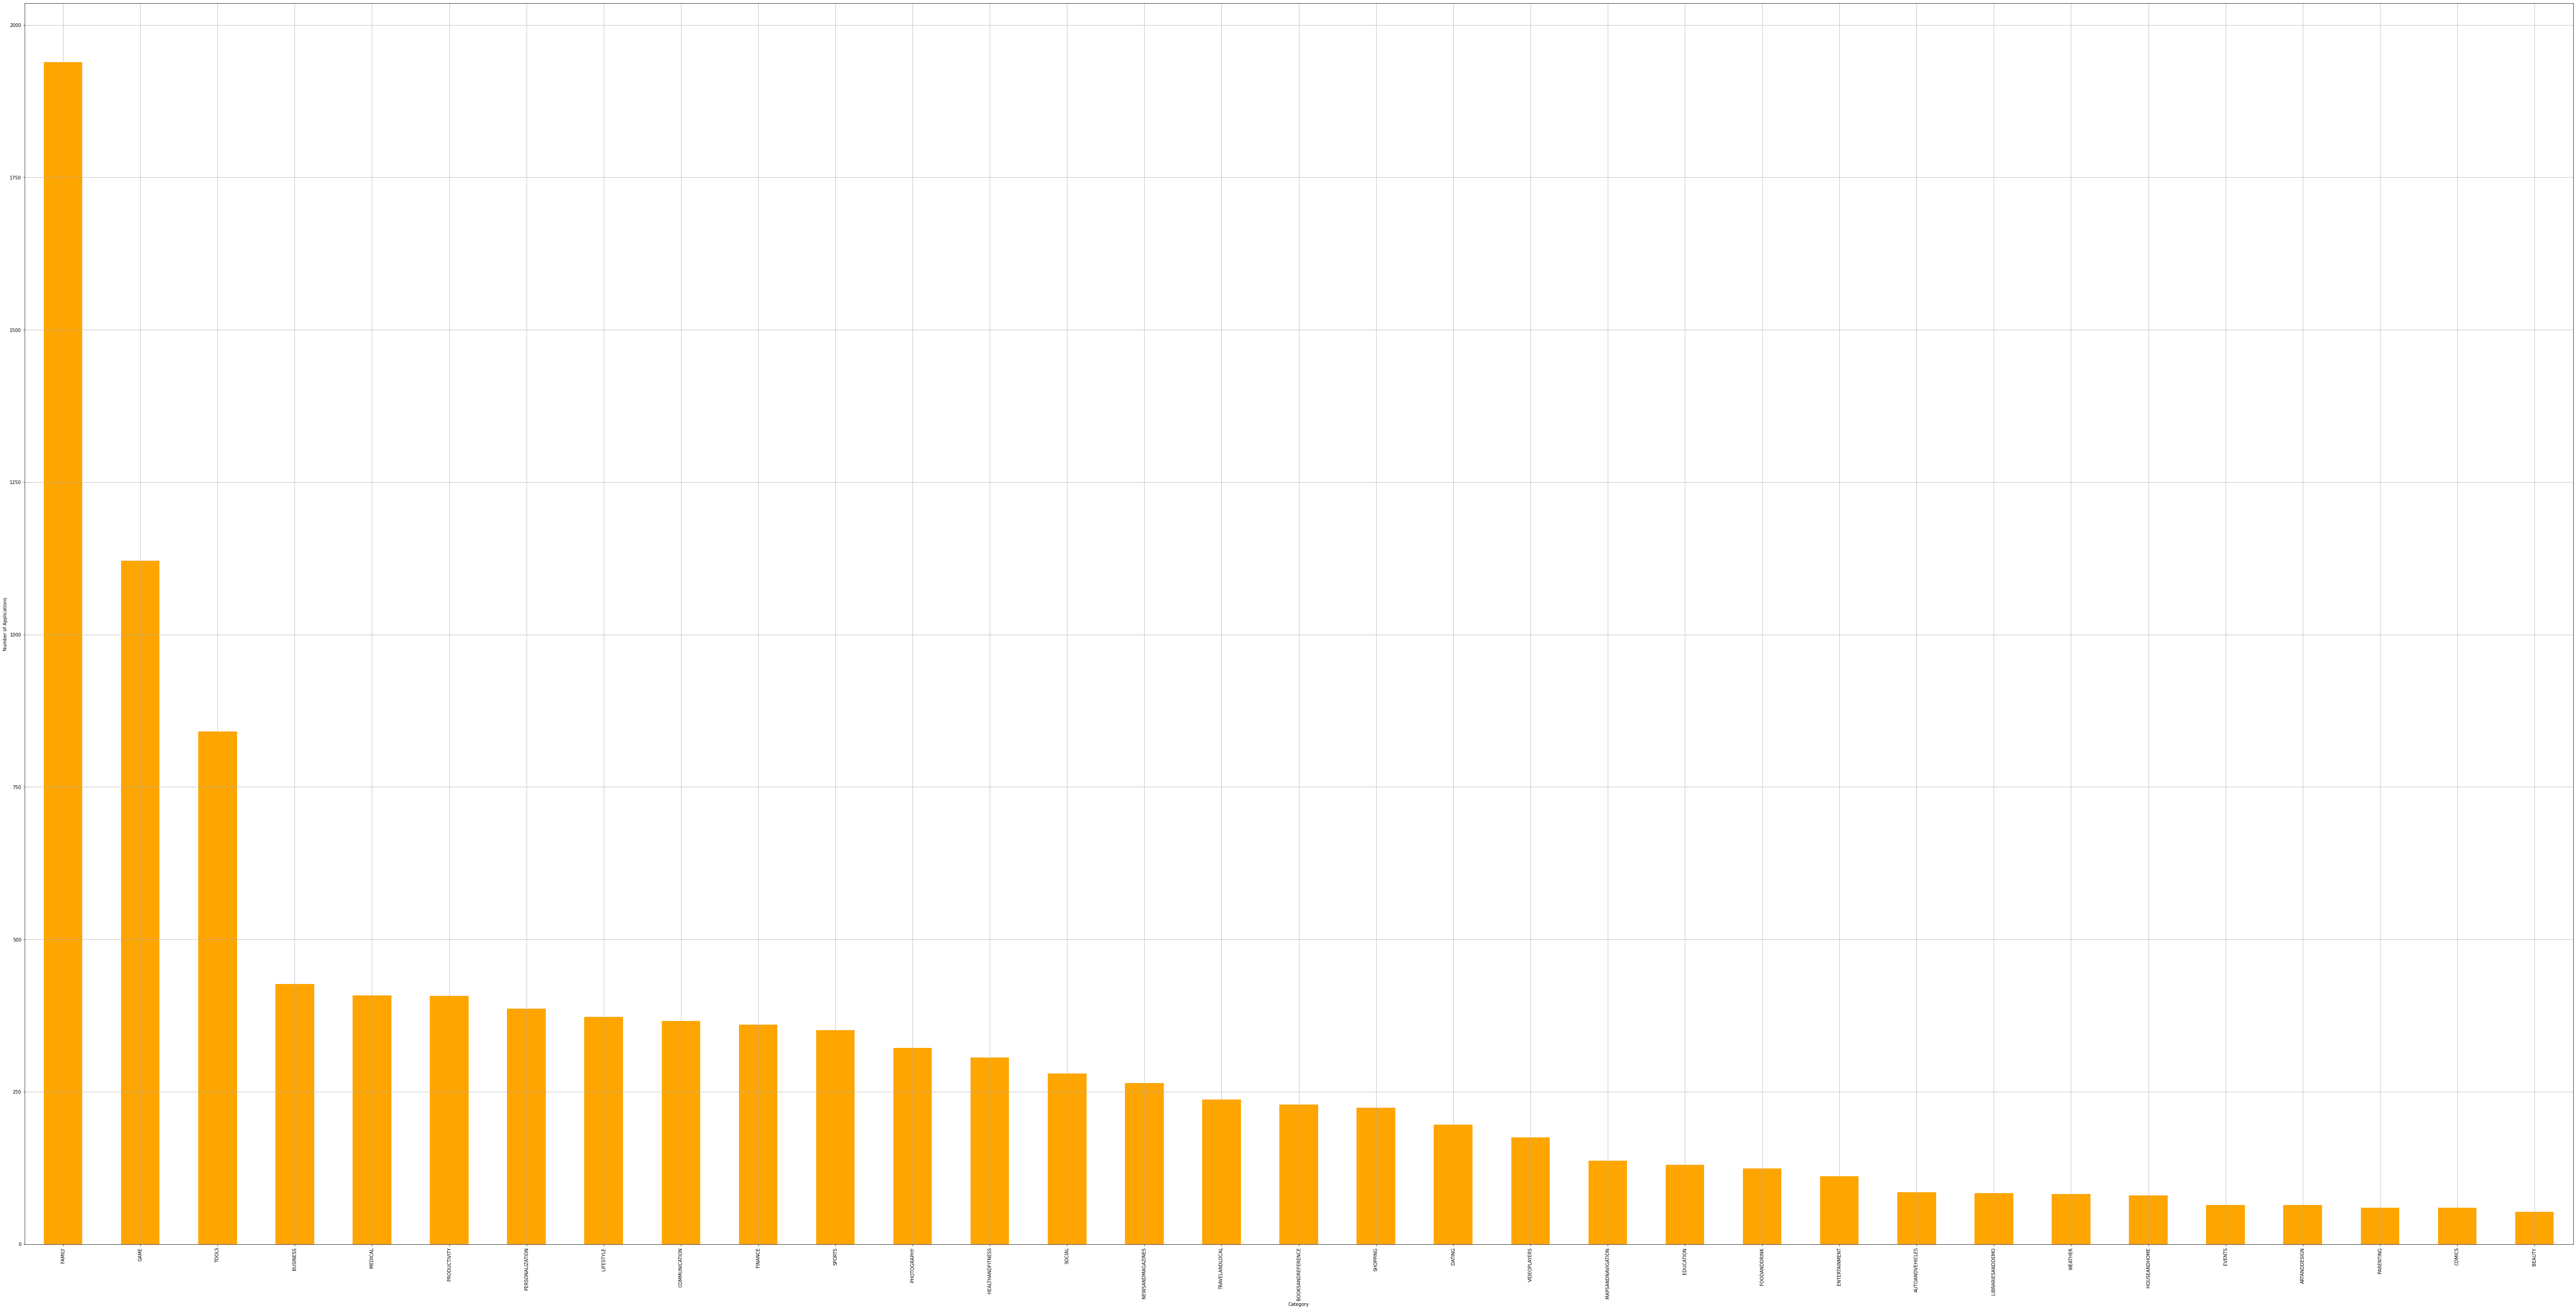

In [26]:
#Most Popular Category-Bar Graph
plt.figure(figsize=(100,50))
apps['Category'].value_counts().plot(kind='bar',color='orange')
plt.xlabel('Category')
plt.ylabel('Number of Applications')
plt.grid()
plt.show()

Therefore from the above tasks, we can clearly state that Family, Game and Tools category has the most application, whereas, Beauty, Comics and Parenting category has the lowest number of application.

3.2. Content Rating Distribution\
From this we will try to find which content rating has the most apps from the category-Everyone, Teen, Adults and Unrated.

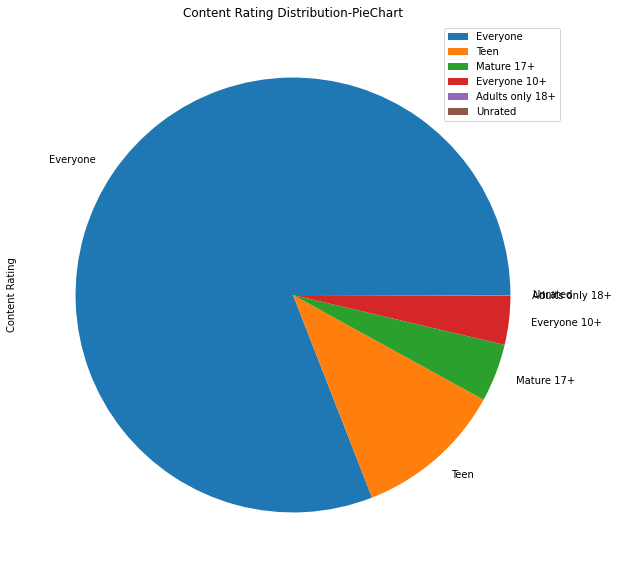

In [27]:
#Content Rating Distribution-Piechart
plt.figure(figsize=(60,10))
apps['Content Rating'].value_counts().plot(kind='pie')
plt.title('Content Rating Distribution-PieChart')
plt.legend()
plt.show()

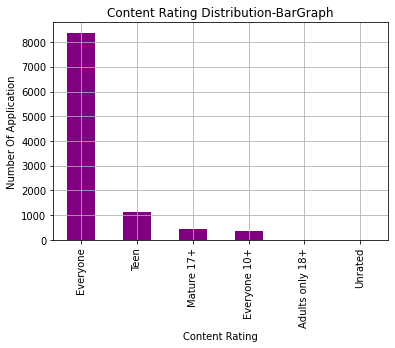

In [28]:
#Content Rating Distribution- Bar Graph
plt.figure()
apps['Content Rating'].value_counts().plot(kind='bar',color='purple')
plt.xlabel('Content Rating')
plt.ylabel('Number Of Application')
plt.title('Content Rating Distribution-BarGraph')
plt.grid()
plt.show()

Clearly we can see that Content Rating-Everyone and Teen constitute the maojority of the market and Unrated and Adult only 18+ have less then 10.

3.3. Genres Distribution\
We will look which Genre has the most number of applications.

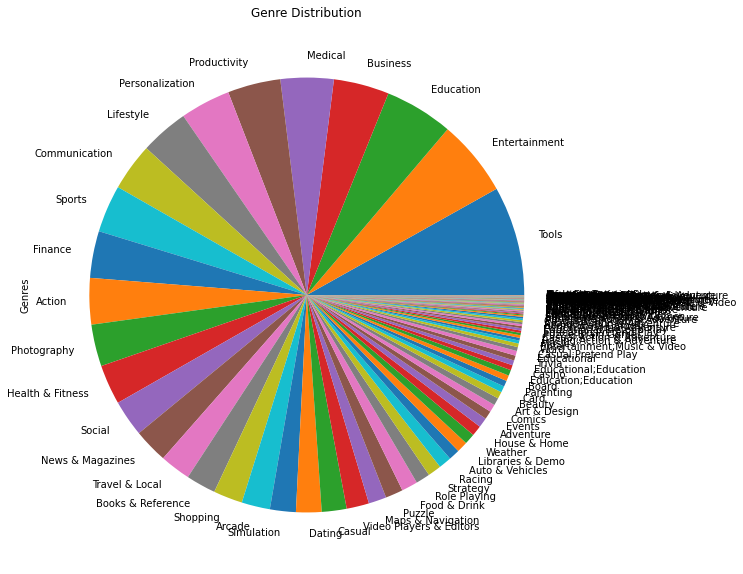

In [29]:
#Genres Distribution-PieChart
plt.figure(figsize=(60,10))
apps['Genres'].value_counts().plot(kind='pie')
plt.title('Genre Distribution')
plt.show()

Tools has the most application followed by Entertainment, Education and Business.

3.4 Distribution of Apps on the basis of Type-Free&Paid\
Plotting graph to know which Type of application is dominant in the store.

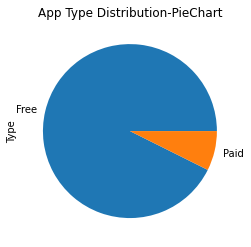

In [30]:
#App Type Classification-PieChart
plt.figure()
apps['Type'].value_counts().plot(kind='pie')
plt.title('App Type Distribution-PieChart')
plt.show()

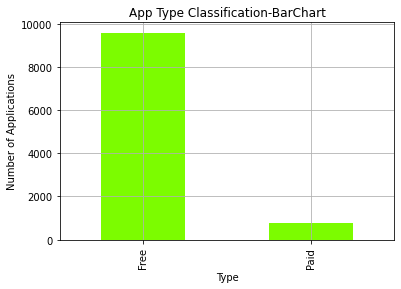

In [31]:
#App Type Classification-BarGraph
plt.figure()
apps['Type'].value_counts().plot(kind='bar', color='lawngreen')
plt.xlabel('Type')
plt.ylabel('Number of Applications')
plt.title('App Type Classification-BarChart')
plt.grid()
plt.show()

In [32]:
apps['Type'].value_counts()

Free    9584
Paid     762
Name: Type, dtype: int64

We can clearly see that Free Apps(9584) is dominated over Paid Apps(602).

3.5. Most Reviewed Application
Knowing the most reviewed application and plotting them in a graph.

In [36]:
#App with largest number of reviews
apps[apps['Reviews']==apps['Reviews'].max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price(in $),Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306,0.0,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device


Text(0.5, 1.0, 'Applications with Most Reviews')

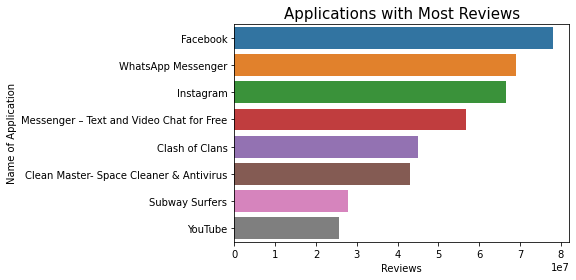

In [38]:
#Most Reviewed Application-BarGraph
#using seaborn
sorted = apps.sort_values(['Reviews'],ascending=0)[:20]
ax = sns.barplot(x = 'Reviews', y = 'App', data = sorted)
ax.set_xlabel('Reviews')
ax.set_ylabel('Name of Application')
ax.set_title('Applications with Most Reviews', size = 15)

Therefore, Facebook is the most reviewed application in the Google Plat Store followed by WhatsApp Messenger and Instagram.

3.6. Most Installed Application in Popular Category\
We will see the most installed apps in popular categories we got to know in the above tasks, i.e., Family, Games, Tools and Business. 

Text(0.5, 1.0, '3.6.1.Popular Application in Family Category')

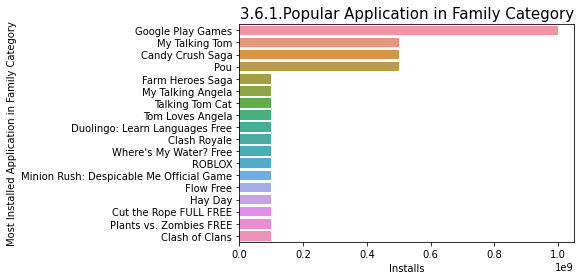

In [41]:
#3.6.1.Most Installed Application in Family Category
apps_cat = apps[apps['Category']=='FAMILY'].sort_values(['Installs'], ascending=0)[:20]
ax = sns.barplot(x = 'Installs', y = 'App', data = apps_cat)
ax.set_xlabel('Installs')
ax.set_ylabel('Most Installed Application in Family Category')
ax.set_title('3.6.1.Popular Application in Family Category', size=15)

Google Play Games is the most dominated application in Family Category, followed by My Talking Tom and Candy Crush Saga.

Text(0.5, 1.0, '3.6.2.Popular Application in Games Category')

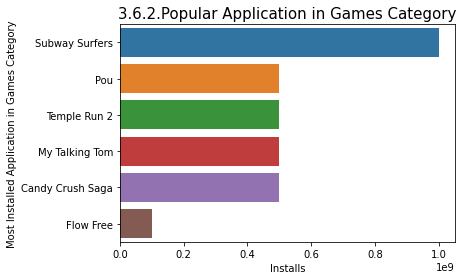

In [45]:
#3.6.2. Most Installed Application in Game Category
apps_cat = apps[apps['Category']=='GAME'].sort_values(['Installs'],ascending=0)[:20]
ax = sns.barplot(x = 'Installs', y = 'App', data = apps_cat)
ax.set_xlabel('Installs')
ax.set_ylabel('Most Installed Application in Games Category')
ax.set_title('3.6.2.Popular Application in Games Category', size = 15)

Subway Surfers is the most popular application in Games Category.

Text(0.5, 1.0, '3.6.3.Popular Application in Tools Category')

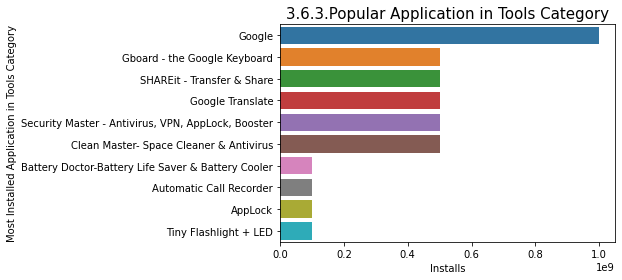

In [50]:
#3.6.3. Most Installed Application in Tools Category
apps_cat = apps[apps['Category']=='TOOLS'].sort_values(['Installs'],ascending=0)[:15]
ax = sns.barplot(x = 'Installs', y = 'App', data = apps_cat)
ax.set_xlabel('Installs')
ax.set_ylabel('Most Installed Application in Tools Category')
ax.set_title('3.6.3.Popular Application in Tools Category', size = 15)

Google is the most popular application in the Tools Category.

Text(0.5, 1.0, '3.6.3.Popular Application in Business Category')

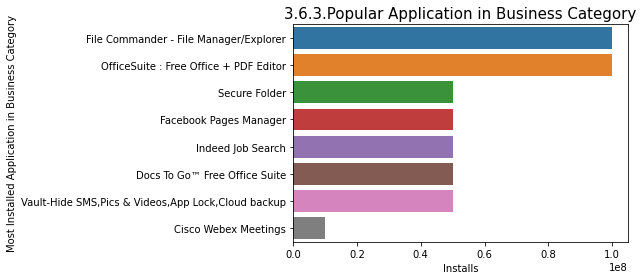

In [48]:
#3.6.4. Most Installed Application in Business Category
apps_cat = apps[apps['Category']=='BUSINESS'].sort_values(['Installs'],ascending=0)[:10]
ax = sns.barplot(x = 'Installs', y = 'App', data = apps_cat)
ax.set_xlabel('Installs')
ax.set_ylabel('Most Installed Application in Business Category')
ax.set_title('3.6.3.Popular Application in Business Category', size = 15)

File Commander-File Manager/Explorer is the most popular application in the Business Category.